## Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

JUPYTER_PATH = Path.cwd()
PROJECT_ROOT = JUPYTER_PATH.parents[0]
os.chdir(PROJECT_ROOT)

print(os.getcwd())

/Users/mungughyeon/Documents/contest/DACON_BDA


In [2]:
train_path = PROJECT_ROOT / "dataset/train.csv"
test_path = PROJECT_ROOT / "dataset/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print(f"Train Dataset: {train.shape}")
print(f"Test Dataset: {test.shape}")

Train Dataset: (748, 46)
Test Dataset: (814, 45)


## EDA

In [3]:
from src.preprocess.eda import BasicEDA

basic_eda = BasicEDA()
train_summary = basic_eda.run(train)
train_str_summary = train_summary[train_summary['dtype'] == 'object'].reset_index(drop=True)
train_num_summary = train_summary[(train_summary['dtype'] == 'int') | (train_summary['dtype'] == 'float')].reset_index(drop=True)

print(f"Str Type: {train_str_summary.shape[0]}")
print(f"Number Type: {train_num_summary.shape[0]}")

Str Type: 34
Number Type: 11


### Train Data EDA

In [4]:
# str type
train_str_summary

,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
0,ID,0.00,TRAIN_000,0.13,748,object
1,major type,2.94,단일 전공,54.81,3,object
2,major1_1,2.67,IT(컴퓨터 공학 포함),33.82,11,object
3,major1_2,58.69,IT(컴퓨터 공학 포함),18.58,10,object
4,job,0.00,대학생,88.50,4,object
5,re_registration,0.00,아니요,80.48,2,object
6,nationality,0.13,내국인,99.60,2,object
7,inflow_route,0.00,에브리타임,45.45,8,object
8,whyBDA,0.00,혼자 공부하기 어려워서,36.23,7,object
9,what_to_gain,0.00,데이터 분석 역량,65.78,9,object


- 신규 가입자는 이전 기수를 수강한 이력이 없으므로 분반 정보가 존재하지 않음
- 따라서 `previous_class_3 ~ 9` 컬럼의 약 80% 결측치는 신규 가입자를 의미함
- `contest_participation`의 결측치는 데이터 관련 대회 참여 경험이 없음으로 해석 가능
- `major1_2`의 결측치는 복수전공을 하지 않은 경우로 판단
- `major type`의 결측치는 복수전공을 했을 경우 응답했을 가능성이 높아 단일 전공으로 대체
- 위 컬럼들은 결측 자체가 의미를 가지는 경우로 판단하여 없음, 해당없음 등의 값으로 대체함

In [5]:
# check NULL
train_str_nan_cols = train_str_summary[train_str_summary['missing_ratio'] >= 1]
train_str_nan_cols

,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
1,major type,2.94,단일 전공,54.81,3,object
2,major1_1,2.67,IT(컴퓨터 공학 포함),33.82,11,object
3,major1_2,58.69,IT(컴퓨터 공학 포함),18.58,10,object
11,previous_class_3,80.48,해당없음,19.25,3,object
12,previous_class_4,80.48,해당없음,19.12,4,object
13,previous_class_5,80.48,해당없음,18.18,5,object
14,previous_class_6,80.48,해당없음,16.71,10,object
15,previous_class_7,80.48,해당없음,15.11,12,object
16,previous_class_8,80.48,해당없음,4.14,16,object
17,major_field,3.07,IT (컴퓨터 공학 포함),18.45,43,object


In [6]:
# first NULL filtering
replaceable_list = train_str_nan_cols[train_str_nan_cols['mode_value'] == '해당없음']['columns'].tolist()
replaceable_list = replaceable_list + ['major type', 'major1_2', 'contest_participation']
train_str_nan_cols = train_str_nan_cols[~train_str_nan_cols['columns'].isin(replaceable_list)]
train_str_nan_cols.reset_index(drop=True, inplace=True)
train_str_nan_cols

,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
0,major1_1,2.67,IT(컴퓨터 공학 포함),33.82,11,object
1,major_field,3.07,IT (컴퓨터 공학 포함),18.45,43,object


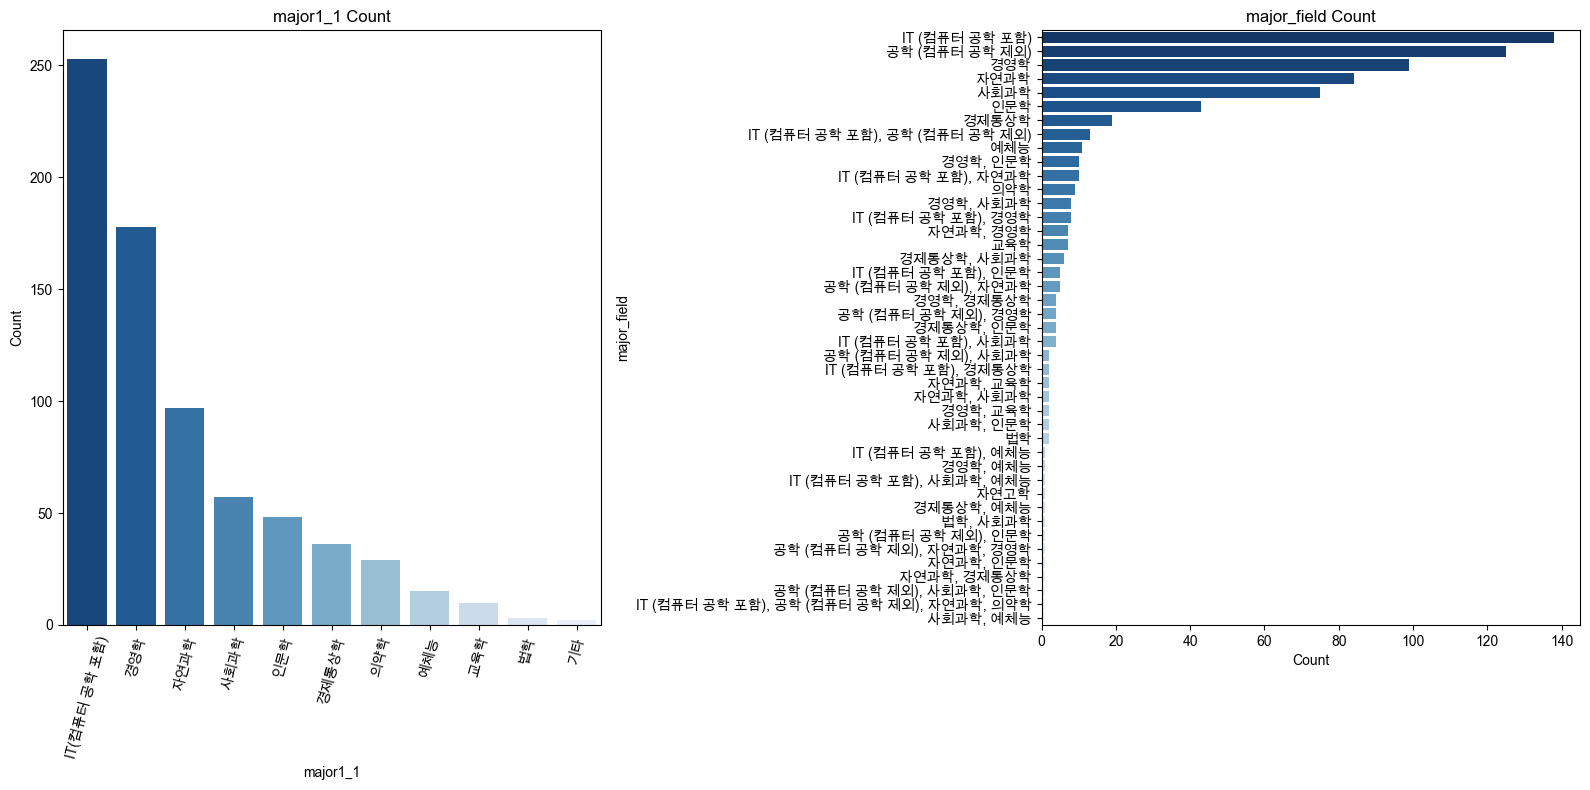

In [7]:
from src.visualization import set_korean_font, count_plot, bar_plot, box_plot                                                                                                                            
set_korean_font()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))                                                                                                                                           
count_plot(train, 'major1_1', ax=axes[0], show=False, rotation=75)                                                                
count_plot(train, 'major_field', ax=axes[1], show=False, orient='h') # 가로 막대                                                     
plt.tight_layout()                                                                                                                
plt.show()  

In [8]:
# num type
train_num_summary

,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
0,generation,0.00,9,100.00,1,int64
1,school1,0.00,11,4.81,92,int64
2,class1,0.00,4,21.26,10,int64
3,class2,77.41,5.0,4.68,9,float64
4,class3,98.13,6.0,0.53,5,float64
5,class4,99.87,12.0,0.13,1,float64
6,contest_award,100.00,NaN,0.00,0,float64
7,completed_semester,3.74,6.0,27.41,13,float64
8,time_input,0.00,2.0,52.81,14,float64
9,idea_contest,100.00,NaN,0.00,0,float64


- `generation`은 BDA 기수를 의미하며, 모든 값이 9기로 동일하여 예측에 정보를 주지 않으므로 삭제 고려                              
- `class2~4`는 각 학기별 수강 분반을 의미하며, 재수강하지 않은 신규 가입자는 이전 분반 정보가 없음                                
- `class2`의 77.41% 결측률이 `re_registration` "아니요" 비율(80.48%)과 유사한 점이 이를 뒷받침함                                  
- 따라서 `class2~4`은 0으로 대체하거나 삭제 고려                                       
- `contest_award`는 공모전 수상 경력, `idea_contest`는 아이디어 공모전 경험을 의미하나 100% 결측으로 삭제 고려
- `completed_semester`는 대학교 이수학기를 의미하며, 3.74% 결측은 단순 미응답으로 판단하여 중앙값 대체 고려

In [9]:
# str type 결측치 대체
previous_class_cols = [
    'previous_class_3', 'previous_class_4', 'previous_class_5',
    'previous_class_6', 'previous_class_7', 'previous_class_8'
]
train[previous_class_cols] = train[previous_class_cols].fillna('해당없음')
train['contest_participation'] = train['contest_participation'].fillna('없음')
train['major1_2'] = train['major1_2'].fillna('없음')
train['major type'] = train['major type'].fillna('단일 전공')
train['major1_1'] = train['major1_1'].fillna('미응답')
train['major_field'] = train['major_field'].fillna('미응답')
train['nationality'] = train['nationality'].fillna(train['nationality'].mode()[0])

# num type 결측치 대체
train['class2'] = train['class2'].fillna(0)
train['class3'] = train['class3'].fillna(0)
train['class4'] = train['class4'].fillna(0)
test.isna().sum()[test.isna().sum() > 0]

major type                74
major1_1                  73
major1_2                 183
class2                   572
class3                   768
class4                   807
contest_award            814
previous_class_3         659
previous_class_4         659
previous_class_5         659
previous_class_6         659
previous_class_7         659
previous_class_8         659
major_field               74
completed_semester        74
contest_participation    814
idea_contest             814
dtype: int64

- Class Imbalance

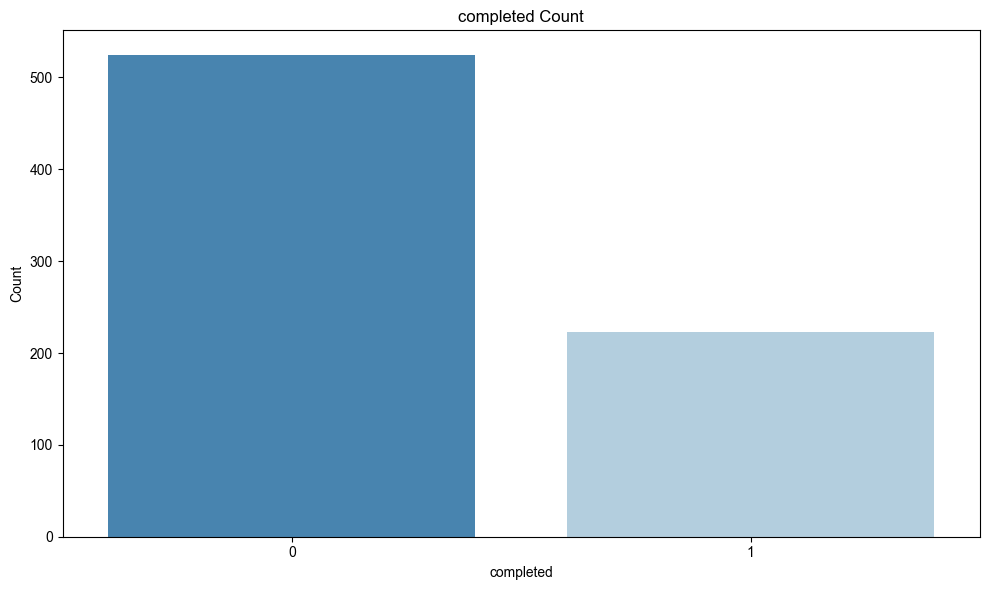

<Axes: title={'center': 'completed Count'}, xlabel='completed', ylabel='Count'>

In [10]:
count_plot(df=train, col='completed')

In [11]:
train.columns

Index(['ID', 'generation', 'school1', 'major type', 'major1_1', 'major1_2',
       'major_data', 'job', 'class1', 'class2', 'class3', 'class4',
       're_registration', 'contest_award', 'nationality', 'inflow_route',
       'whyBDA', 'what_to_gain', 'hope_for_group', 'previous_class_3',
       'previous_class_4', 'previous_class_5', 'previous_class_6',
       'previous_class_7', 'previous_class_8', 'major_field',
       'desired_career_path', 'completed_semester', 'project_type',
       'time_input', 'desired_job', 'certificate_acquisition',
       'desired_certificate', 'desired_job_except_data', 'incumbents_level',
       'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'contest_participation', 'idea_contest',
       'onedayclass_topic', 'completed'],
      dtype='object')

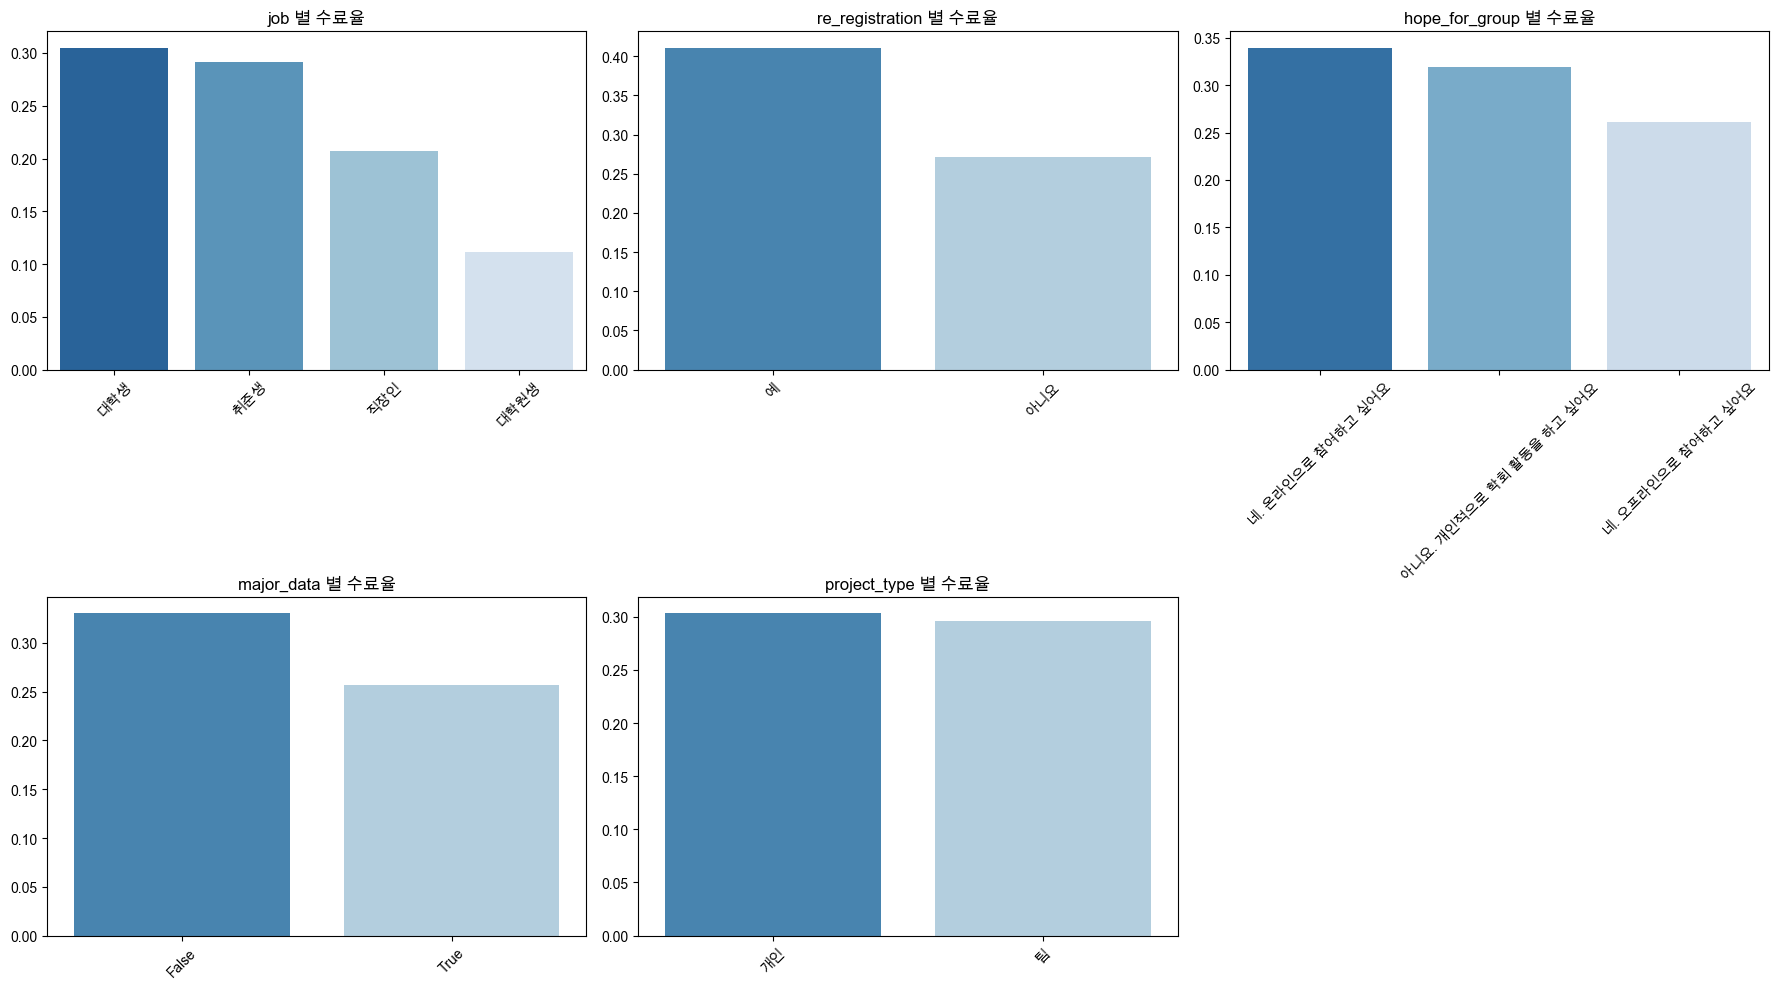

In [12]:
# 주요 features
key_cols = ['job', 're_registration', 'hope_for_group', 'major_data', 'project_type']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(key_cols):
    rate_df = train.groupby(col)['completed'].mean().reset_index()
    rate_df.columns = [col, 'completion_rate']
    rate_df = rate_df.sort_values('completion_rate', ascending=False)
    bar_plot(
        rate_df,
        x_col=col,
        y_col='completion_rate',
        ax=axes[i],
        title=f'{col} 별 수료율',
        rotation=45,
        show=False
    )

axes[-1].set_visible(False)  # 빈 subplot 숨기기
plt.tight_layout()
plt.show()

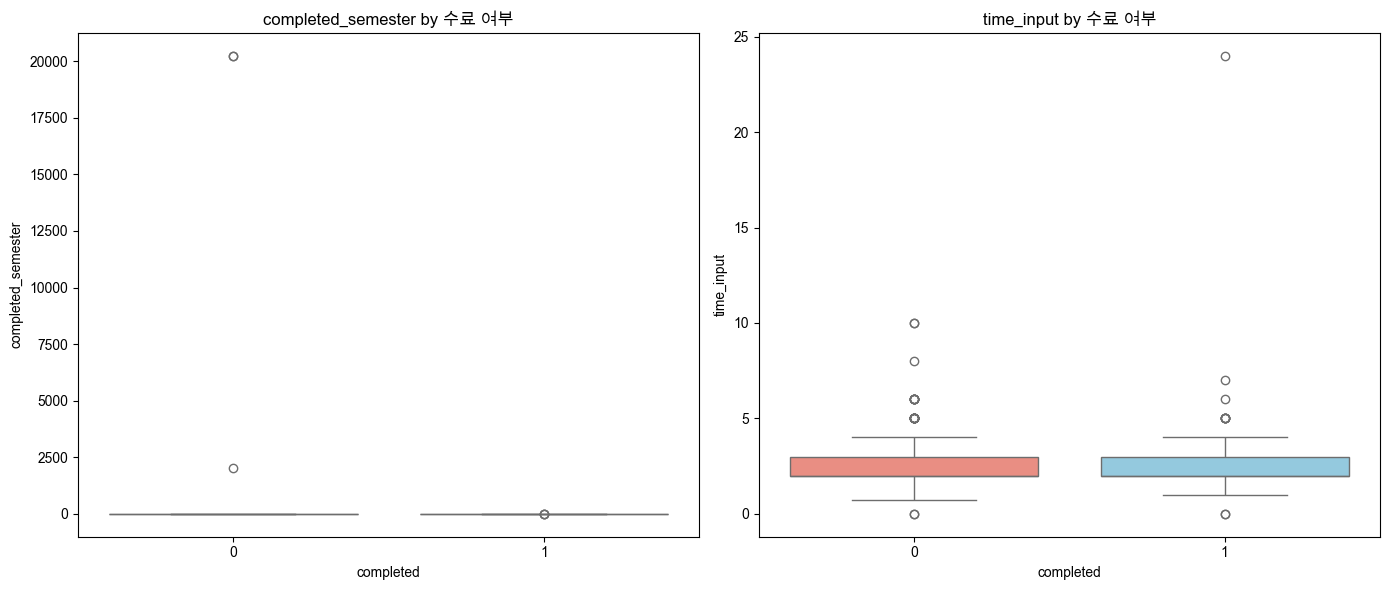

In [13]:
num_cols = ['completed_semester', 'time_input']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(num_cols):
    box_plot(
        train,
        col,
        hue='completed',
        ax=axes[i],
        palette=['salmon', 'skyblue'],
        title=f'{col} by 수료 여부',
        show=False
    )

plt.tight_layout()
plt.show()

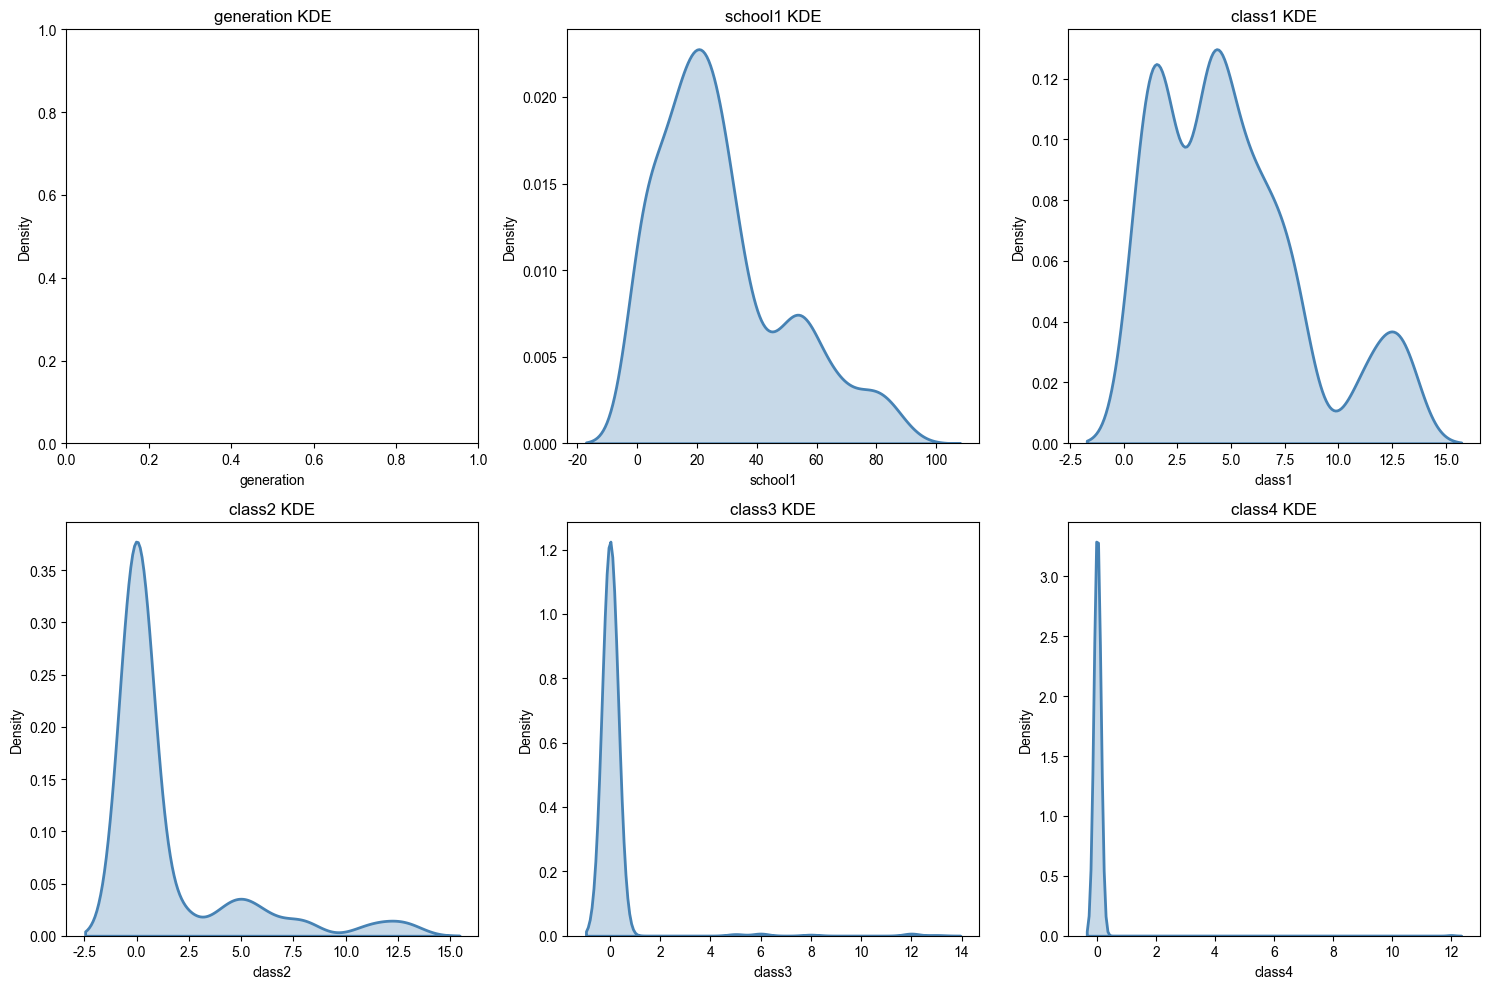

In [14]:
from src.visualization.plot import kde_plot, hist_plot, heatmap_plot

train_num_cols = train.select_dtypes(include=['number']).columns.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(train_num_cols):
    if i >= len(axes):
        break
    kde_plot(train, col, ax=axes[i], show=False)

plt.tight_layout()
plt.show()

In [15]:
from src.preprocess.eda import AdvanceEDA

# outlier check
Advance_eda = AdvanceEDA()
outlier_df = Advance_eda.check_outlier_iqr(train)
outlier_df

,column,q1,q3,iqr,lower_bound,upper_bound,outlier_cnt,outlier_ratio,min,max
0,generation,9.0,9.0,0.0,9.0,9.0,0,0.00,9.0,9.0
1,school1,13.0,38.0,25.0,-24.5,75.5,31,4.14,0.0,91.0
2,class1,2.0,7.0,5.0,-5.5,14.5,0,0.00,1.0,13.0
3,class2,0.0,0.0,0.0,0.0,0.0,169,22.59,0.0,13.0
4,class3,0.0,0.0,0.0,0.0,0.0,14,1.87,0.0,13.0
5,class4,0.0,0.0,0.0,0.0,0.0,1,0.13,0.0,12.0
6,contest_award,NaN,NaN,NaN,NaN,NaN,0,0.00,NaN,NaN
7,completed_semester,5.0,8.0,3.0,0.5,12.5,4,0.56,0.0,20241.0
8,time_input,2.0,3.0,1.0,0.5,4.5,37,4.95,0.0,24.0
9,idea_contest,NaN,NaN,NaN,NaN,NaN,0,0.00,NaN,NaN


In [16]:
train.loc[train['completed_semester'] > 10, 'completed_semester'] = pd.NA
job_median = train.groupby('job')['completed_semester'].median()                                     
overall_median = train['completed_semester'].median()    

for job, med in job_median.items():
      mask = (train['completed_semester'].isna()) & (train['job'] == job)
      train.loc[mask, 'completed_semester'] = med
train['completed_semester'] = train['completed_semester'].fillna(overall_median)
print(train.isna().sum().sum())

1496


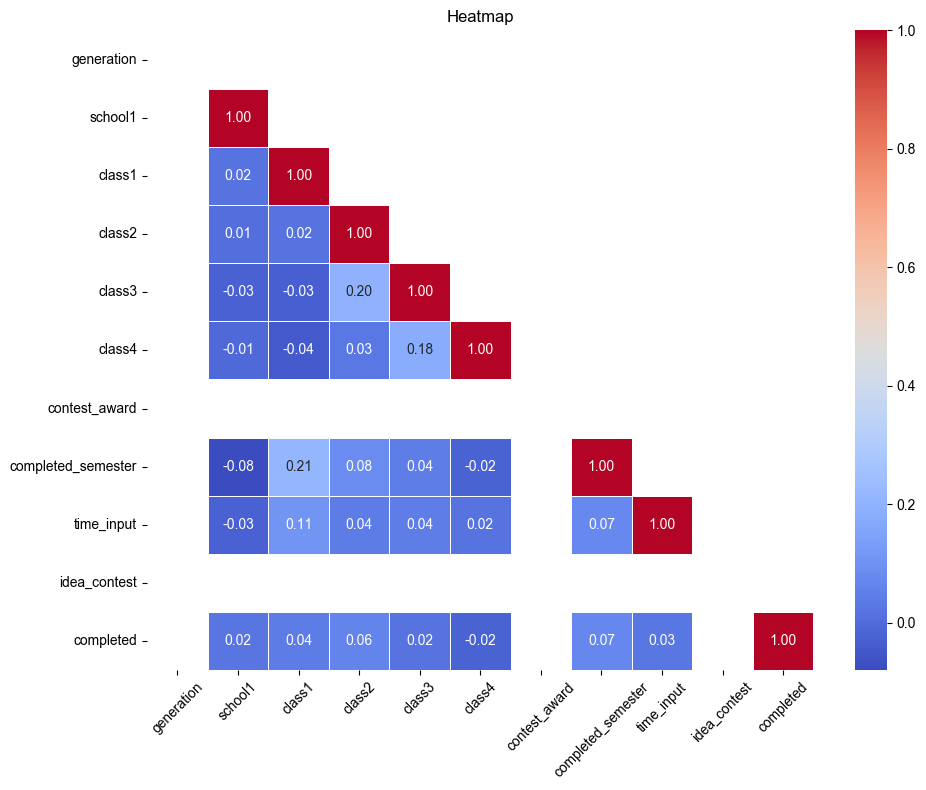

정규성 만족 비율: 10.0% → SPEARMAN 선택


,column,method,correlation,p_value,abs_corr,significant
3,class2,spearman,0.0687,0.0604,0.0687,False
7,completed_semester,spearman,0.0512,0.1621,0.0512,False
2,class1,spearman,0.0490,0.1811,0.0490,False
1,school1,spearman,0.0361,0.3246,0.0361,False
5,class4,spearman,-0.0238,0.5149,0.0238,False
4,class3,spearman,0.0179,0.6249,0.0179,False
8,time_input,spearman,0.0053,0.8855,0.0053,False
0,generation,spearman,NaN,NaN,NaN,False
6,contest_award,spearman,NaN,NaN,NaN,False
9,idea_contest,spearman,NaN,NaN,NaN,False


In [17]:
# corr
heatmap_plot(train, mask='upper', cmap='coolwarm');
corr_df = Advance_eda.check_correlation(train, target='completed', method='auto')
corr_df

In [18]:
chi2_df = Advance_eda.check_chi2_test(train, target='completed')                                      
chi2_df  

,column,unique,chi2,p_value,cramers_v,expected_>=5_ratio,valid
0,re_registration,2,10.3772,0.0013,0.1178,100.0,True
1,certificate_acquisition,27,51.8342,0.0019,0.2632,16.7,False
2,whyBDA,7,17.7647,0.0068,0.1541,100.0,True
3,major1_2,11,22.1591,0.0143,0.1721,54.5,False
4,previous_class_8,16,26.8360,0.0301,0.1894,31.2,False
5,inflow_route,8,14.4150,0.0443,0.1388,62.5,False
6,hope_for_group,3,4.7640,0.0924,0.0798,100.0,True
7,incumbents_lecture_type,3,4.4383,0.1087,0.0770,100.0,True
8,major type,3,4.1803,0.1237,0.0748,66.7,False
9,previous_class_4,4,5.1411,0.1618,0.0829,25.0,False


In [19]:
chi2_df[(chi2_df['p_value'] < 0.05) & (chi2_df['valid'] == True)]

,column,unique,chi2,p_value,cramers_v,expected_>=5_ratio,valid
0,re_registration,2,10.3772,0.0013,0.1178,100.0,True
2,whyBDA,7,17.7647,0.0068,0.1541,100.0,True


### Test Data EDA

In [20]:
test.columns

Index(['ID', 'generation', 'school1', 'major type', 'major1_1', 'major1_2',
       'major_data', 'job', 'class1', 'class2', 'class3', 'class4',
       're_registration', 'contest_award', 'nationality', 'inflow_route',
       'whyBDA', 'what_to_gain', 'hope_for_group', 'previous_class_3',
       'previous_class_4', 'previous_class_5', 'previous_class_6',
       'previous_class_7', 'previous_class_8', 'major_field',
       'desired_career_path', 'completed_semester', 'project_type',
       'time_input', 'desired_job', 'certificate_acquisition',
       'desired_certificate', 'desired_job_except_data', 'incumbents_level',
       'incumbents_lecture', 'incumbents_company_level',
       'incumbents_lecture_type', 'incumbents_lecture_scale',
       'incumbents_lecture_scale_reason', 'interested_company',
       'expected_domain', 'contest_participation', 'idea_contest',
       'onedayclass_topic'],
      dtype='object')

In [21]:
test_summary = basic_eda.run(test)
test_str_summary = test_summary[test_summary['dtype'] == 'object'].reset_index(drop=True)
test_num_summary = test_summary[(test_summary['dtype'] == 'int') | (test_summary['dtype'] == 'float')].reset_index(drop=True)

print(f"Str Type: {test_str_summary.shape[0]}")
print(f"Number Type: {test_num_summary.shape[0]}")

test_str_summary

Str Type: 33
Number Type: 11


,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
0,ID,0.00,TEST_000,0.12,814,object
1,major type,9.09,단일 전공,54.79,2,object
2,major1_1,8.97,경영학과,5.77,288,object
3,major1_2,22.48,없음,41.28,153,object
4,job,0.00,대학생,84.77,4,object
5,re_registration,0.00,아니요,80.96,2,object
6,nationality,0.00,내국인,99.51,2,object
7,inflow_route,0.00,에브리타임,51.47,11,object
8,whyBDA,0.00,혼자 공부하기 어려워서,46.31,9,object
9,what_to_gain,0.00,데이터 분석 역량,61.67,7,object


In [22]:
# check NULL
test_str_nan_cols = test_str_summary[test_str_summary['missing_ratio'] >= 1]
test_str_nan_cols

,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
1,major type,9.09,단일 전공,54.79,2,object
2,major1_1,8.97,경영학과,5.77,288,object
3,major1_2,22.48,없음,41.28,153,object
11,previous_class_3,80.96,해당없음,18.92,2,object
12,previous_class_4,80.96,해당없음,18.55,4,object
13,previous_class_5,80.96,해당없음,17.69,4,object
14,previous_class_6,80.96,해당없음,16.83,6,object
15,previous_class_7,80.96,해당없음,15.60,9,object
16,previous_class_8,80.96,해당없음,13.02,14,object
17,major_field,9.09,IT (컴퓨터 공학 포함),19.66,56,object


In [23]:
# check NULL
test_num_nan_cols = test_num_summary[test_num_summary['missing_ratio'] >= 1]
test_num_nan_cols

,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
3,class2,70.27,5.0,6.76,10,float64
4,class3,94.35,5.0,1.72,8,float64
5,class4,99.14,5.0,0.25,5,float64
6,contest_award,100.00,NaN,0.00,0,float64
7,completed_semester,9.09,5.0,20.88,10,float64
9,contest_participation,100.00,NaN,0.00,0,float64
10,idea_contest,100.00,NaN,0.00,0,float64


In [24]:
# str type 결측치 대체
previous_class_cols = [
    'previous_class_3', 'previous_class_4', 'previous_class_5',
    'previous_class_6', 'previous_class_7', 'previous_class_8'
]
test[previous_class_cols] = test[previous_class_cols].fillna('해당없음')
test['contest_participation'] = test['contest_participation'].fillna('없음')
test['major1_2'] = test['major1_2'].fillna('없음')
test['major type'] = test['major type'].fillna('단일 전공')
test['major1_1'] = test['major1_1'].fillna('미응답')
test['major_field'] = test['major_field'].fillna('미응답')
test['nationality'] = test['nationality'].fillna(test['nationality'].mode()[0])

# num type 결측치 대체
test['class2'] = test['class2'].fillna(0)
test['class3'] = test['class3'].fillna(0)
test['class4'] = test['class4'].fillna(0)
test.isna().sum()[test.isna().sum() > 0]

contest_award         814
completed_semester     74
idea_contest          814
dtype: int64

In [25]:
outlier_df = Advance_eda.check_outlier_iqr(test)
outlier_df

,column,q1,q3,iqr,lower_bound,upper_bound,outlier_cnt,outlier_ratio,min,max
0,generation,10.0,10.0,0.0,10.0,10.0,0,0.00,10.0,10.0
1,school1,10.0,38.0,28.0,-32.0,80.0,32,3.93,0.0,98.0
2,class1,2.0,8.0,6.0,-7.0,17.0,0,0.00,1.0,16.0
3,class2,0.0,4.0,4.0,-6.0,10.0,66,8.11,0.0,16.0
4,class3,0.0,0.0,0.0,0.0,0.0,46,5.65,0.0,16.0
5,class4,0.0,0.0,0.0,0.0,0.0,7,0.86,0.0,15.0
6,contest_award,NaN,NaN,NaN,NaN,NaN,0,0.00,NaN,NaN
7,completed_semester,5.0,8.0,3.0,0.5,12.5,0,0.00,1.0,10.0
8,time_input,2.0,3.0,1.0,0.5,4.5,68,8.35,0.0,12.0
9,idea_contest,NaN,NaN,NaN,NaN,NaN,0,0.00,NaN,NaN


In [26]:
test.loc[test['completed_semester'] > 10, 'completed_semester'] = pd.NA
for job, med in job_median.items():  # train에서 계산한 job_median
      mask = (test['completed_semester'].isna()) & (test['job'] == job)
      test.loc[mask, 'completed_semester'] = med
test['completed_semester'] = test['completed_semester'].fillna(overall_median)
test.isna().sum()[test.isna().sum() > 0]

contest_award    814
idea_contest     814
dtype: int64

In [27]:
train_str_nan = train_str_summary[train_str_summary['missing_ratio'] >= 1]['columns'].tolist()
test_str_nan = test_str_summary[test_str_summary['missing_ratio'] >= 1]['columns'].tolist()

set(train_str_nan) - set(test_str_nan)

{'contest_participation'}

In [28]:
def compare_categorical(train_df, test_df, exclude_cols=['ID', 'completed']):                        
    """Train과 Test의 범주형 변수 비교"""                                                            
    train_cat = train_df.select_dtypes(include='object').columns                                     
    test_cat = test_df.select_dtypes(include='object').columns                                       
                                                                                                    
    # 공통 컬럼만                                                                                    
    common_cols = [c for c in train_cat if c in test_cat and c not in exclude_cols]                  
                                                                                                    
    results = []                                                                                     
    for col in common_cols:                                                                          
        train_unique = set(train_df[col].dropna().unique())                                          
        test_unique = set(test_df[col].dropna().unique())                                            
                                                                                                    
        only_train = train_unique - test_unique  # train에만 있는 값                                 
        only_test = test_unique - train_unique   # test에만 있는 값                                  
        common = train_unique & test_unique      # 공통 값                                           
                                                                                                    
        results.append({                                                                             
            'column': col,                                                                           
            'train_unique': len(train_unique),                                                       
            'test_unique': len(test_unique),                                                         
            'common': len(common),                                                                   
            'only_train': len(only_train),                                                           
            'only_test': len(only_test),                                                             
            'coverage': round(len(common) / len(test_unique) * 100, 1) if len(test_unique) > 0 else 0
        })                                                                                                                                                               
    return pd.DataFrame(results).sort_values('coverage', ascending=False).reset_index(drop=True)

In [29]:
compare_df = compare_categorical(train, test)                                                        
compare_df 

,column,train_unique,test_unique,common,only_train,only_test,coverage
0,major type,3,2,2,1,0,100.0
1,incumbents_lecture_type,3,3,3,0,0,100.0
2,project_type,2,2,2,0,0,100.0
3,previous_class_8,16,14,14,2,0,100.0
4,previous_class_6,10,6,6,4,0,100.0
5,previous_class_5,5,4,4,1,0,100.0
6,hope_for_group,3,3,3,0,0,100.0
7,previous_class_3,3,2,2,1,0,100.0
8,nationality,2,2,2,0,0,100.0
9,re_registration,2,2,2,0,0,100.0


In [30]:
from src.preprocess.preprocessing import Preprocessor

test['major1_1'] = test['major1_1'].apply(Preprocessor.map_major_to_category)
test['major1_2'] = test['major1_2'].apply(Preprocessor.map_major_to_category)

print(f"major1_1 Unique count: {test['major1_1'].nunique()}")
print(f"major1_2 Unique count: {test['major1_2'].nunique()}")

major1_1 Unique count: 11
major1_2 Unique count: 11


In [31]:
# 삭제
drop_cols = [
    'generation', 'contest_award', 
    'idea_contest', 'contest_participation', 'idea_contest']

train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)

print(f"Train cols: {train.shape[1]}")
print(f"Test cols: {test.shape[1]}")

Train cols: 42
Test cols: 41


## Preprocessing

In [32]:
import re

CERT_MAP = {
    'ADsP': ['ADsP', 'adsp', 'ADSP'],
    'SQLD': ['SQLD', 'sqld'],
    '빅데이터분석기사': ['빅데이터 분석 기사', '빅데이터분석기사', '빅분기'],
    '정보처리기사': ['정보처리기사', '정보처리산업기사', '정보처리기능사'],
    '구글애널리스트': ['구글 애널리스트', '구글애널리스트'],
    '컴퓨터활용능력': ['컴퓨터 활용능력', '컴퓨터활용능력', '컴활'],
    '태블로': ['태블로'],
}

def split_certs(text):
    if pd.isna(text) or text.strip() in ('없음', '.', '해당없음', '딱히 없음'):
        return []
   
    cleaned = re.sub(r'\(([^)]*)\)', lambda m: m.group(0).replace(',', ';'), text)
    parts = [p.strip().replace(';', ',') for p in cleaned.split(',')]
    return [p for p in parts if p]

def match_cert(cert_name, cert_map):
    for key, aliases in cert_map.items():
        if any(alias in cert_name for alias in aliases):
            return key
    return None

def encode_certs(series, cert_map, prefix):
    keys = list(cert_map.keys())
    result = pd.DataFrame(0, index=series.index, columns=[f'{prefix}_{k}' for k in keys])
    result[f'{prefix}_count'] = 0

    for idx, val in series.items():
        certs = split_certs(val)
        result.at[idx, f'{prefix}_count'] = len(certs)
        for c in certs:
            matched = match_cert(c, cert_map)
            if matched:
                result.at[idx, f'{prefix}_{matched}'] = 1

    return result

In [33]:
for df_name, df in [('train', train), ('test', test)]:                                               
      cert = encode_certs(df['certificate_acquisition'], CERT_MAP, 'cert')                             
      dcert = encode_certs(df['desired_certificate'], CERT_MAP, 'dcert')
      if df_name == 'train':                                                                           
          train = pd.concat([train, cert, dcert], axis=1)                                              
      else:
          test = pd.concat([test, cert, dcert], axis=1)                                                

print(f"Train: {train.shape}, Test: {test.shape}")

Train: (748, 58), Test: (814, 57)


In [34]:
COMPANY_CATEGORIES = {                                                                               
    'IT_플랫폼': ['네이버', '카카오', '토스', '쿠팡', '당근', '무신사', '배민', '배달의민족',        
                '라인', '넥슨', 'NC', '네카라쿠배', '야놀자', '직방', '왓챠', '리디',
                '카카오뱅크', '토스뱅크', '카카오스타일', '지그재그', '마켓컬리'],
    'IT_글로벌': ['구글', 'Google', 'google', '애플', 'Apple', '마이크로소프트', 'MS',
                '아마존', 'Amazon', 'AWS', '메타', 'Meta', '엔비디아', 'NVIDIA',
                'openai', 'OpenAI'],
    '대기업': ['삼성', 'LG', 'SK', 'sk', 'Sk', '현대', 'CJ', '롯데', '포스코', 'POSCO',
            '한화', 'GS', '두산', '하이닉스', 'SDS', 'CNS'],
    '금융': ['은행', '국민은행', '신한', '하나은행', '기업은행', 'NH', '우리은행',
            '증권', '보험', '금융', '카드', '현대카드', '미래에셋'],
    '공공': ['공기업', '공공기관', '한전', '한국전력', '공무원'],
    '제약_바이오': ['셀트리온', '삼성바이오', '한미약품', '제약'],
    '소비재': ['아모레퍼시픽', '매일유업', 'P&G', '올리브영'],
}

def category_company(text):
    if pd.isna(text):
        return '없음'
    t = str(text).strip()
    if t in ('.', '/', '없음', '아직 없음', '없습니다', '딱히 없음', '모름', '아직없음', ''):
        return '없음'

    matched = set()
    for category, keywords in COMPANY_CATEGORIES.items():
        if any(kw in t for kw in keywords):
            matched.add(category)

    if not matched:
        return '기타'
    # 우선순위: IT_플랫폼 > IT_글로벌 > 대기업 > 금융 > 나머지
    priority = ['IT_플랫폼', 'IT_글로벌', '대기업', '금융', '공공', '제약_바이오', '소비재']
    for p in priority:
        if p in matched:
            return p
    return '기타'

def count_companies(text):
    """관심 기업 개수"""
    if pd.isna(text):
        return 0
    t = str(text).strip()
    if t in ('.', '/', '없음', '아직 없음', '없습니다', '딱히 없음', '모름', ''):
        return 0
    # 콤마 또는 / 로 split
    parts = re.split(r'[,/]', t)
    return len([p for p in parts if p.strip()])

In [35]:
for df_name, df in [('train', train), ('test', test)]:                                               
    df['company_category'] = df['interested_company'].apply(category_company)                        
    df['company_count'] = df['interested_company'].apply(count_companies)                            

drop_cols = [
    'certificate_acquisition', 
    'desired_certificate',
    'interested_company']

train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)

print(f"Train cols: {train.shape[1]}")
print(f"Test cols: {test.shape[1]}\n")
print(f"Train: {train['company_category'].value_counts().to_dict()}")                                
print(f"Test: {test['company_category'].value_counts().to_dict()}")             

Train cols: 57
Test cols: 56

Train: {'IT_플랫폼': 211, '기타': 201, '대기업': 181, '금융': 52, '없음': 47, 'IT_글로벌': 36, '소비재': 9, '공공': 6, '제약_바이오': 5}
Test: {'IT_플랫폼': 216, '기타': 192, '대기업': 178, '없음': 90, '금융': 68, 'IT_글로벌': 50, '소비재': 13, '제약_바이오': 4, '공공': 3}


In [36]:
train_summary = basic_eda.run(train)
train_str_summary = train_summary[train_summary['dtype'] == 'object'].reset_index(drop=True)
train_num_summary = train_summary[(train_summary['dtype'] == 'int') | (train_summary['dtype'] == 'float')].reset_index(drop=True)

unique_median = train_str_summary['unique_cnt'].median()
print(f"Unique median: {unique_median}")
train_str_summary[train_str_summary['unique_cnt'] > unique_median]

Unique median: 9.0


,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
0,ID,0.0,TRAIN_000,0.13,748,object
2,major1_1,0.0,IT(컴퓨터 공학 포함),33.82,12,object
3,major1_2,0.0,없음,58.69,11,object
14,previous_class_6,0.0,해당없음,97.19,10,object
15,previous_class_7,0.0,해당없음,95.59,12,object
16,previous_class_8,0.0,해당없음,84.63,16,object
17,major_field,0.0,IT (컴퓨터 공학 포함),18.45,44,object
20,desired_job,0.0,B. 데이터 분석가,17.78,174,object
21,desired_job_except_data,0.0,A. 금융 / 보험 직무,10.29,99,object
23,incumbents_lecture,0.0,커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),51.34,10,object


In [37]:
MF_KEYS = ['IT (컴퓨터 공학 포함)', '공학 (컴퓨터 공학 제외)', '경영학', '자연과학',                 
            '사회과학', '인문학', '경제통상학', '예체능', '교육학', '의약학', '법학']                 

for df in [train, test]:
    for key in MF_KEYS:
        short = key.split('(')[0].strip().replace(' ', '')
        df[f'mf_{short}'] = df['major_field'].fillna('').str.contains(key.replace('(',
r'\(').replace(')', r'\)')).astype(int)

    # 자연고학(오타) → 자연과학
    df.loc[df['major_field'].fillna('').str.contains('자연고학'), 'mf_자연과학'] = 1
    df['mf_count'] = df[[c for c in df.columns if c.startswith('mf_') and c !=
'mf_count']].sum(axis=1)

print(train[[c for c in train.columns if c.startswith('mf_')]].sum())

mf_IT       183
mf_공학       153
mf_경영학      144
mf_자연과학     115
mf_사회과학     103
mf_인문학       67
mf_경제통상학     37
mf_예체능       16
mf_교육학       11
mf_의약학       10
mf_법학         3
mf_count    842
dtype: int64


In [38]:
DJ_MAP = {
    'dj_분석가': '데이터 분석가',
    'dj_사이언티스트': '데이터 사이언티스트',
    'dj_엔지니어': '데이터 엔지니어',
    'dj_AI전문가': '인공지능 전문가',
    'dj_마케터': '마케터',
    'dj_PM기획': 'PM/서비스 기획자',  # PM, 기획 둘 다 매칭
    'dj_개발자': '소프트웨어 개발자',
    'dj_연구자': '연구자',
    'dj_MD': 'MD',
    'dj_디자이너': 'UI/UX',
}

for df in [train, test]:
    text = df['desired_job'].fillna('')
    for col, kw in DJ_MAP.items():
        df[col] = text.str.contains(kw, case=False).astype(int)
    df['dj_count'] = text.apply(lambda x: len([p for p in x.split(',') if p.strip()]) if x else 0)

print(train[[c for c in train.columns if c.startswith('dj_')]].sum())

dj_분석가        482
dj_사이언티스트     298
dj_엔지니어       180
dj_AI전문가      117
dj_마케터        109
dj_PM기획       110
dj_개발자         75
dj_연구자         36
dj_MD          25
dj_디자이너        23
dj_count     1533
dtype: int64


In [39]:
DJE_MAP = {
    'dje_금융보험': '금융 / 보험',
    'dje_기획전략': '기획 / 전략',
    'dje_MD': 'MD',
    'dje_개발자': '소프트웨어 개발자',
    'dje_디자이너': 'UI/UX',
    'dje_PM기획': 'PM / 서비스 기획자',
    'dje_연구자': '자연과학계열 연구자',
    'dje_마케터영업': '마케터 / 영업',
}

for df in [train, test]:
    text = df['desired_job_except_data'].fillna('')
    for col, kw in DJE_MAP.items():
        df[col] = text.str.contains(kw, case=False).astype(int)
    df['dje_count'] = text.apply(lambda x: len([p for p in x.split(',') if p.strip()]) if x else 0)

print(train[[c for c in train.columns if c.startswith('dje_')]].sum())

dje_금융보험      273
dje_기획전략      328
dje_MD         50
dje_개발자       212
dje_디자이너       86
dje_PM기획      216
dje_연구자       114
dje_마케터영업     172
dje_count    1451
dtype: int64


In [40]:
ODC_MAP = {
    'odc_Python': 'Python',
    'odc_시각화': '시각화',
    'odc_ML_DL': '머신러닝',       # 머신러닝 / 딥러닝
    'odc_SQL': 'SQL',
    'odc_크롤링': '크롤링',
    'odc_AI모델': 'AI모델',
    'odc_Hadoop': 'Hadoop',
    'odc_Tableau': ['Tableau', '태블로', '테블로'],
}

for df in [train, test]:
    text = df['onedayclass_topic'].fillna('')
    for col, kw in ODC_MAP.items():
        if isinstance(kw, list):
            df[col] = text.apply(lambda x, kws=kw: int(any(k in x for k in kws)))
        else:
            df[col] = text.str.contains(kw, case=False).astype(int)
    # count: 괄호 보호 후 split
    df['odc_count'] = text.apply(
        lambda x: len([p for p in re.sub(r'\([^)]*\)', '', x).split(',') if p.strip()]) if x else 0
    )

print(train[[c for c in train.columns if c.startswith('odc_')]].sum())

odc_Python      333
odc_시각화         427
odc_ML_DL       394
odc_SQL         262
odc_크롤링         181
odc_AI모델          0
odc_Hadoop        0
odc_Tableau       4
odc_count      1612
dtype: int64


In [41]:
ED_MAP = {
    'ed_정보통신': 'J.',
    'ed_금융보험': 'K.',
    'ed_전문과학기술': 'M.',
    'ed_예술스포츠': 'R.',
    'ed_국제외국기관': 'U.',
    'ed_제조': 'C.',
    'ed_공공행정': 'O.',
    'ed_교육': 'P.',
    'ed_도매소매': 'G.',
    'ed_보건복지': 'Q.',
}

for df in [train, test]:
    text = df['expected_domain'].fillna('')
    for col, code in ED_MAP.items():
        df[col] = text.str.contains(re.escape(code)).astype(int)
    df['ed_count'] = text.apply(lambda x: len(re.findall(r'[A-Z]\.', x)) if x else 0)

print(train[[c for c in train.columns if c.startswith('ed_')]].sum())

ed_정보통신       261
ed_금융보험       276
ed_전문과학기술     260
ed_예술스포츠      107
ed_국제외국기관      92
ed_제조          61
ed_공공행정        56
ed_교육          40
ed_도매소매        30
ed_보건복지        33
ed_count     1324
dtype: int64


In [42]:
def map_company_level(text):
    if pd.isna(text):
        return '기타'
    t = str(text).strip()
    if '빅테크' in t and '국내' in t:
        return '국내빅테크'
    if '대기업' in t:
        return '국내대기업'
    if '해외' in t:
        return '해외빅테크'
    if '스타트업' in t:
        return '스타트업'
    return '기타'

for df in [train, test]:
    df['company_level'] = df['incumbents_company_level'].apply(map_company_level)

print(f"{train['company_level'].value_counts()}\n")
print(f"{test['company_level'].value_counts()}")

company_level
국내대기업    297
국내빅테크    285
해외빅테크    114
스타트업      43
기타         9
Name: count, dtype: int64

company_level
국내대기업    325
국내빅테크    303
해외빅테크    132
스타트업      48
기타         6
Name: count, dtype: int64


In [43]:
drop_cols = [                                                                                        
    'certificate_acquisition', 'desired_certificate',                                              
    'interested_company', 'major_field',                                                             
    'desired_job', 'desired_job_except_data',                                                      
    'onedayclass_topic', 'expected_domain',                                                          
    'incumbents_company_level'
] 
                                                                 
for df_name in ['train', 'test']:
    df = eval(df_name)
    cols = [c for c in drop_cols if c in df.columns]
    if df_name == 'train':
        train = df.drop(columns=cols)
    else:
        test = df.drop(columns=cols)

print(f"Train: {train.shape}, Test: {test.shape}")

Train: (748, 104), Test: (814, 103)


정규성 만족 비율: 3.9% → SPEARMAN 선택


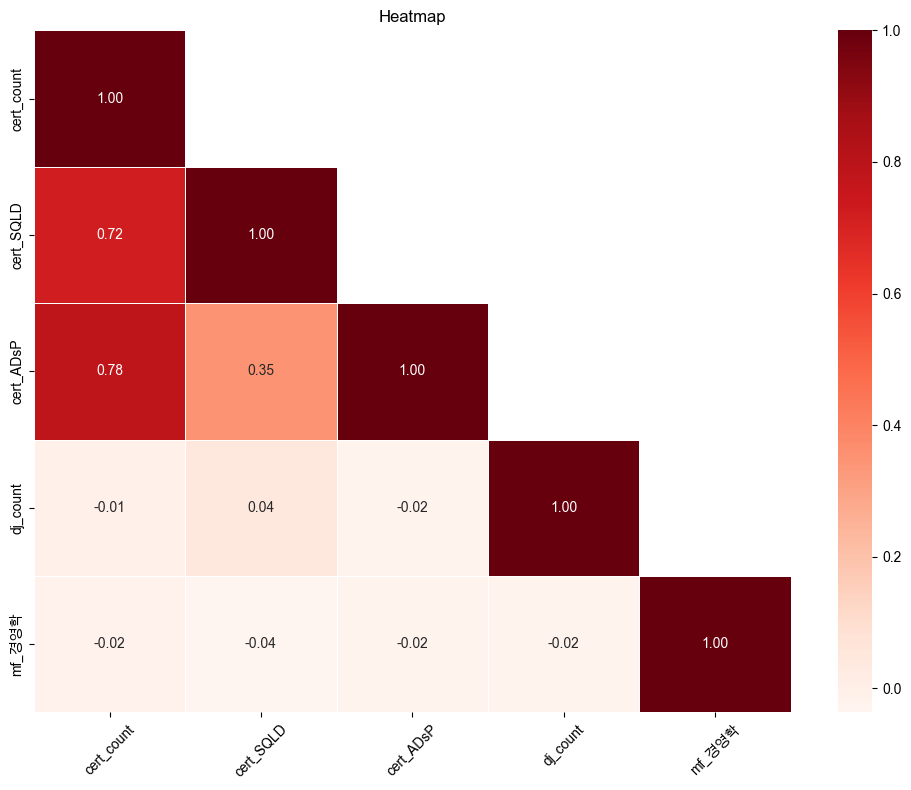

,column,method,correlation,p_value,abs_corr,significant
0,cert_count,spearman,0.1428,0.0001,0.1428,True
1,cert_SQLD,spearman,0.1247,0.0006,0.1247,True
2,cert_ADsP,spearman,0.1104,0.0025,0.1104,True
3,dj_count,spearman,-0.1002,0.0061,0.1002,True
4,mf_경영학,spearman,-0.0958,0.0087,0.0958,True


In [44]:
# corr
corr_df = Advance_eda.check_correlation(train, target='completed', method='auto')
true_corr = corr_df[corr_df['significant'] == True]
true_corr_cols = true_corr['column'].tolist()

heatmap_plot(train[true_corr_cols], mask='upper', cmap='Reds');
true_corr.reset_index(drop=True)

In [45]:
train_copy = train.copy()
test_copy = test.copy()

drop_cols = ['incumbents_lecture_scale_reason']
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)

train_summary = basic_eda.run(train)
train_str_summary = train_summary[train_summary['dtype'] == 'object'].reset_index(drop=True)
train_num_summary = train_summary[(train_summary['dtype'] == 'int') | (train_summary['dtype'] == 'float')].reset_index(drop=True)
train_str_summary

,columns,missing_ratio,mode_value,mode_ratio,unique_cnt,dtype
0,ID,0.0,TRAIN_000,0.13,748,object
1,major type,0.0,단일 전공,57.75,3,object
2,major1_1,0.0,IT(컴퓨터 공학 포함),33.82,12,object
3,major1_2,0.0,없음,58.69,11,object
4,job,0.0,대학생,88.50,4,object
5,re_registration,0.0,아니요,80.48,2,object
6,nationality,0.0,내국인,99.73,2,object
7,inflow_route,0.0,에브리타임,45.45,8,object
8,whyBDA,0.0,혼자 공부하기 어려워서,36.23,7,object
9,what_to_gain,0.0,데이터 분석 역량,65.78,9,object


### Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

train = train.drop(columns=['ID'])
test_id = test['ID']
test = test.drop(columns=['ID'])

str_cols = train.select_dtypes(include='object').columns.tolist()
label_encoders = {}

for col in str_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]).astype(str))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le

print(f"Encoded {len(str_cols)} columns: {str_cols}")
print(f"Train: {train.shape}, Test: {test.shape}")

Encoded 24 columns: ['major type', 'major1_1', 'major1_2', 'job', 're_registration', 'nationality', 'inflow_route', 'whyBDA', 'what_to_gain', 'hope_for_group', 'previous_class_3', 'previous_class_4', 'previous_class_5', 'previous_class_6', 'previous_class_7', 'previous_class_8', 'desired_career_path', 'project_type', 'incumbents_level', 'incumbents_lecture', 'incumbents_lecture_type', 'incumbents_lecture_scale', 'company_category', 'company_level']
Train: (748, 102), Test: (814, 101)


### Scaler

In [47]:
from sklearn.preprocessing import RobustScaler

num_cols = train.select_dtypes(include=['number']).columns.tolist()                        
num_cols = [c for c in num_cols if c != 'completed']

scaler = RobustScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])
print(f"Scaled {len(num_cols)} columns: {num_cols}")

Scaled 100 columns: ['school1', 'major type', 'major1_1', 'major1_2', 'job', 'class1', 'class2', 'class3', 'class4', 're_registration', 'nationality', 'inflow_route', 'whyBDA', 'what_to_gain', 'hope_for_group', 'previous_class_3', 'previous_class_4', 'previous_class_5', 'previous_class_6', 'previous_class_7', 'previous_class_8', 'desired_career_path', 'completed_semester', 'project_type', 'time_input', 'incumbents_level', 'incumbents_lecture', 'incumbents_lecture_type', 'incumbents_lecture_scale', 'cert_ADsP', 'cert_SQLD', 'cert_빅데이터분석기사', 'cert_정보처리기사', 'cert_구글애널리스트', 'cert_컴퓨터활용능력', 'cert_태블로', 'cert_count', 'dcert_ADsP', 'dcert_SQLD', 'dcert_빅데이터분석기사', 'dcert_정보처리기사', 'dcert_구글애널리스트', 'dcert_컴퓨터활용능력', 'dcert_태블로', 'dcert_count', 'company_category', 'company_count', 'mf_IT', 'mf_공학', 'mf_경영학', 'mf_자연과학', 'mf_사회과학', 'mf_인문학', 'mf_경제통상학', 'mf_예체능', 'mf_교육학', 'mf_의약학', 'mf_법학', 'mf_count', 'dj_분석가', 'dj_사이언티스트', 'dj_엔지니어', 'dj_AI전문가', 'dj_마케터', 'dj_PM기획', 'dj_개발자', 'dj_연구자', 'dj_MD', '

### Model

In [48]:
import numpy as np                                                                                   
import lightgbm as lgb                                                                               
from sklearn.model_selection import StratifiedKFold                                                  
from sklearn.metrics import f1_score 
from tqdm.notebook import tqdm                                                           
                                                                                                    
X = train.drop(columns=['completed'])                                                                
y = train['completed']

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(test))
results = []

for fold, (train_idx, val_idx) in enumerate(tqdm(skf.split(X, y), total=skf.n_splits, desc="K-Fold")):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    print(f"\nFold {fold+1} - Train: {len(X_train)}, Val: {len(X_val)} (pos ratio: {y_val.mean():.2%})")

    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        class_weight='balanced',
        verbose=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
    )

    oof_preds[val_idx] = model.predict(X_val)
    test_preds += model.predict_proba(test)[:, 1] / skf.n_splits
    fold_f1 = f1_score(y_val, oof_preds[val_idx])
    results.append({'fold': fold+1, 'f1_score': round(fold_f1, 4)})

result_df = pd.DataFrame(results)
result_df.loc[len(result_df)] = ['Overall', round(f1_score(y, oof_preds), 4)]
result_df

K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


Fold 1 - Train: 673, Val: 75 (pos ratio: 29.33%)
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.65049
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.64223

Fold 2 - Train: 673, Val: 75 (pos ratio: 29.33%)
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.62305

Fold 3 - Train: 673, Val: 75 (pos ratio: 29.33%)
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.640084

Fold 4 - Train: 673, Val: 75 (pos ratio: 29.33%)
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.615819
Early stopping, best iteration is:
[85]	valid_0's binary_logloss: 0.610212

Fold 5 - Train: 673, Val: 75 (pos ratio: 29.33%)
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.645209
Early stopping, best iter

,fold,f1_score
0,1,0.3830
1,2,0.2632
2,3,0.3902
3,4,0.4091
4,5,0.2051
5,6,0.3571
6,7,0.3529
7,8,0.3043
8,9,0.4348
9,10,0.5417


Best threshold: 0.15, OOF F1: 0.3684


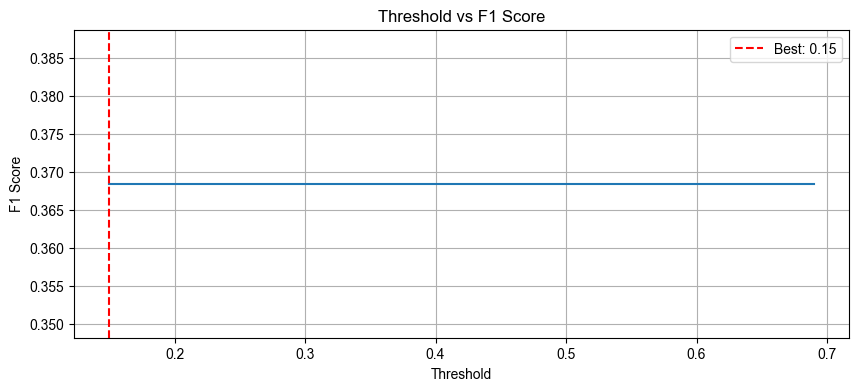

In [51]:
best_f1, best_thresh = 0, 0.5
thresh_results = []

for thresh in np.arange(0.15, 0.70, 0.01):
    oof_binary = (oof_preds >= thresh).astype(int)
    score = f1_score(y, oof_binary)
    thresh_results.append({'threshold': round(thresh, 2), 'f1_score': round(score, 4)})
    if score > best_f1:
        best_f1, best_thresh = score, thresh

print(f"Best threshold: {best_thresh:.2f}, OOF F1: {best_f1:.4f}")

thresh_df = pd.DataFrame(thresh_results)
plt.figure(figsize=(10, 4))
plt.plot(thresh_df['threshold'], thresh_df['f1_score'])
plt.axvline(x=best_thresh, color='r', linestyle='--', label=f'Best: {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('Threshold vs F1 Score')
plt.legend()
plt.grid(True)
plt.show()

### Hyperparameters tuning

In [77]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):                                                               
    params = {                                                                    
        'n_estimators': trial.suggest_int('n_estimators', 50, 3000),                
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 15),                         
        'num_leaves': trial.suggest_int('num_leaves', 4, 256),                      
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 150),        
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),                    
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),      
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-10, 100.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-10, 100.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 15.0),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 5.0),
        'random_state': 42,
        'verbose': -1,
    }

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    oof_probs = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = lgb.LGBMClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            callbacks=[lgb.early_stopping(50, verbose=False), lgb.log_evaluation(0)]
        )
        oof_probs[val_idx] = model.predict_proba(X_val)[:, 1]

    best_f1 = 0
    for thresh in np.arange(0.10, 0.70, 0.01):
        score = f1_score(y, (oof_probs >= thresh).astype(int))
        if score > best_f1:
            best_f1 = score
    return best_f1

In [59]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

print(f"\nBest F1: {study.best_value:.4f}")
print(f"Best params: {study.best_params}")

  0%|          | 0/100 [00:00<?, ?it/s]


Best F1: 0.5054
Best params: {'n_estimators': 417, 'learning_rate': 0.07010929944776166, 'max_depth': 11, 'num_leaves': 115, 'min_child_samples': 9, 'subsample': 0.6449756557882595, 'colsample_bytree': 0.40079048341529716, 'reg_alpha': 0.10292336877516428, 'reg_lambda': 0.19863086118928525, 'scale_pos_weight': 1.6758902581587058}


In [60]:
trials_df = study.trials_dataframe()[['number', 'value', 'params_scale_pos_weight',
                                        'params_max_depth', 'params_num_leaves',
                                        'params_learning_rate', 'params_n_estimators']]

trials_df = trials_df.sort_values('value', ascending=False).head(10)
trials_df.columns = ['trial', 'f1_score', 'scale_pos_weight', 'max_depth', 'num_leaves', 'lr', 'n_estimators']
trials_df

,trial,f1_score,scale_pos_weight,max_depth,num_leaves,lr,n_estimators
58,58,0.505393,1.675890,11,115,0.070109,417
93,93,0.504399,2.034809,11,120,0.075103,589
71,71,0.500000,2.437697,11,123,0.071019,399
72,72,0.499353,1.711919,12,117,0.070041,605
53,53,0.491176,1.446748,3,101,0.089155,1331
84,84,0.489985,1.255869,11,114,0.061084,499
97,97,0.489510,2.302581,11,113,0.084074,652
62,62,0.488830,1.649357,11,118,0.100531,306
78,78,0.488688,1.582778,10,101,0.096254,251
64,64,0.488529,1.682393,11,117,0.070624,274


In [62]:
best_params = study.best_params                                                                      
best_params['random_state'] = 42                                                                     
best_params['verbose'] = -1                                                                          
                                                                                                    
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)                                    
oof_probs = np.zeros(len(X))                                                                         
test_preds = np.zeros(len(test))                                                                     
                                                                                                    
for fold, (train_idx, val_idx) in enumerate(tqdm(skf.split(X, y), total=skf.n_splits,
desc="K-Fold")):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = lgb.LGBMClassifier(**best_params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[lgb.early_stopping(50, verbose=False), lgb.log_evaluation(0)]
    )

    oof_probs[val_idx] = model.predict_proba(X_val)[:, 1]
    test_preds += model.predict_proba(test)[:, 1] / skf.n_splits

# Threshold 튜닝
best_f1, best_thresh = 0, 0.5
for thresh in np.arange(0.10, 0.70, 0.01):
    score = f1_score(y, (oof_probs >= thresh).astype(int))
    if score > best_f1:
        best_f1, best_thresh = score, thresh

print(f"Best threshold: {best_thresh:.2f}, OOF F1: {best_f1:.4f}")

# fold별 결과 (best_thresh 기준)
results = []
skf2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf2.split(X, y)):
    fold_f1 = f1_score(y.iloc[val_idx], (oof_probs[val_idx] >= best_thresh).astype(int))
    results.append({'fold': fold+1, 'f1_score': round(fold_f1, 4)})

result_df = pd.DataFrame(results)
result_df.loc[len(result_df)] = ['Overall', round(best_f1, 4)]
result_df

K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]

Best threshold: 0.31, OOF F1: 0.5054


,fold,f1_score
0,1,0.5588
1,2,0.5231
2,3,0.4762
3,4,0.5075
4,5,0.4127
5,6,0.4000
6,7,0.4789
7,8,0.6000
8,9,0.5161
9,10,0.5538


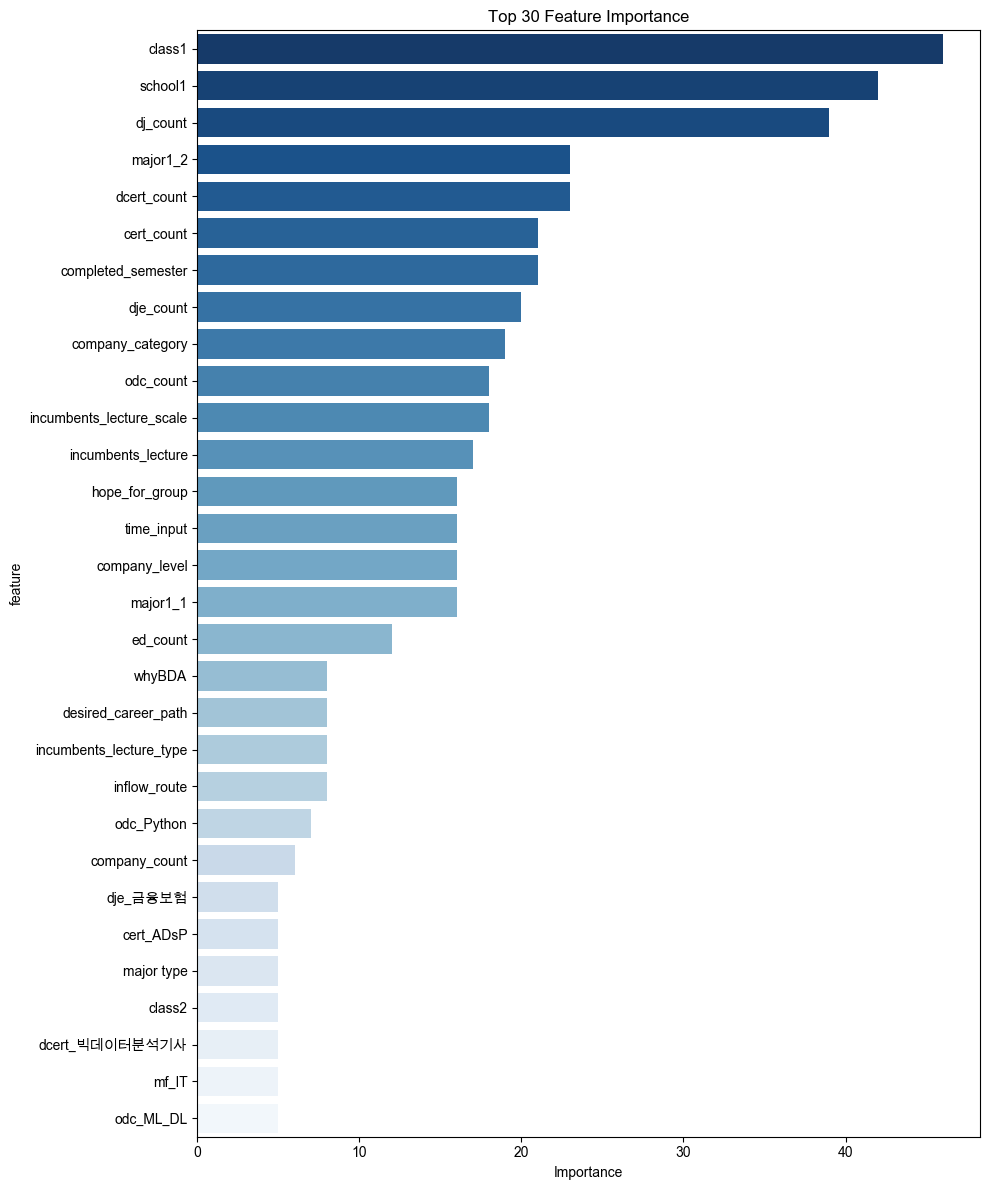

,feature,importance
6,class1,46
0,school1,42
70,dj_count,39
3,major1_2,23
45,dcert_count,23
...,...,...
39,dcert_SQLD,0
10,re_registration,0
11,nationality,0
73,dje_MD,0


In [74]:
importance_df = pd.DataFrame({
    'feature': X.columns,                                                                            
    'importance': model.feature_importances_                                                       
}).sort_values('importance', ascending=False)                                                        
                                                                                                    
plt.figure(figsize=(10, 12))
sns.barplot(x=importance_df['importance'][:30], y=importance_df['feature'][:30], palette='Blues_r')
plt.title('Top 30 Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

importance_df

In [73]:
submission = pd.DataFrame({                                                                          
    'ID': test_id,                                                                                   
    'completed': (test_preds >= best_thresh).astype(int)                                             
})                                                      

submission.to_csv('dataset/baseline_submission.csv', index=False)                                          
print(f"Threshold: {best_thresh:.2f}, OOF F1: {best_f1:.4f}")                                        
print(f"제출 분포:\n{submission['completed'].value_counts()}")

Threshold: 0.31, OOF F1: 0.5054
제출 분포:
completed
1    636
0    178
Name: count, dtype: int64


### Feature Importance

In [75]:
importance_df[['importance']].describe()

,importance
count,101.000000
mean,5.316832
std,8.995477
min,0.000000
25%,0.000000
50%,2.000000
75%,5.000000
max,46.000000


In [76]:
zero_features = importance_df[importance_df['importance'] == 0]['feature'].tolist() 
print(f"Importance 0 피처: {len(zero_features)}개")                                 
print(zero_features)

Importance 0 피처: 40개
['odc_SQL', 'project_type', 'previous_class_4', 'ed_보건복지', 'previous_class_7', 'ed_교육', 'ed_도매소매', 'odc_AI모델', 'odc_Hadoop', 'odc_Tableau', 'ed_공공행정', 'ed_정보통신', 'ed_제조', 'ed_국제외국기관', 'previous_class_5', 'dj_디자이너', 'dje_디자이너', 'incumbents_level', 'class4', 'dcert_구글애널리스트', 'dcert_컴퓨터활용능력', 'dcert_태블로', 'class3', 'cert_태블로', 'cert_컴퓨터활용능력', 'cert_구글애널리스트', 'cert_정보처리기사', 'mf_예체능', 'mf_교육학', 'mf_의약학', 'previous_class_3', 'dj_분석가', 'cert_빅데이터분석기사', 'dj_마케터', 'dj_연구자', 'dcert_SQLD', 're_registration', 'nationality', 'dje_MD', 'mf_법학']


In [82]:
X = X.drop(columns=zero_features)                         
test_final = test.drop(columns=zero_features)                                       
print(f"피처 수: {X.shape[1]}개")                                         
                                                                                    
# Optuna 탐색                                                                       
study_v2 = optuna.create_study(direction='maximize')                                
study_v2.optimize(objective, n_trials=200, show_progress_bar=True)                  
                                                                                    
print(f"\nBest F1: {study_v2.best_value:.4f}")
print(f"Best params: {study_v2.best_params}")

trials_df = study_v2.trials_dataframe()[['number', 'value', 'params_scale_pos_weight',
                                        'params_max_depth', 'params_num_leaves',
                                        'params_learning_rate', 'params_n_estimators']]

trials_df = trials_df.sort_values('value', ascending=False).head(10)
trials_df.columns = ['trial', 'f1_score', 'scale_pos_weight', 'max_depth', 'num_leaves', 'lr', 'n_estimators']
trials_df

피처 수: 61개


  0%|          | 0/200 [00:00<?, ?it/s]


Best F1: 0.5147
Best params: {'n_estimators': 2368, 'learning_rate': 0.39076731792318703, 'max_depth': 10, 'num_leaves': 16, 'min_child_samples': 98, 'subsample': 0.5967400621960105, 'colsample_bytree': 0.21682610187157791, 'reg_alpha': 4.678027769467746e-10, 'reg_lambda': 1.5531902732362025e-05, 'scale_pos_weight': 0.7524839507131073, 'min_split_gain': 0.23221547241650964}


,trial,f1_score,scale_pos_weight,max_depth,num_leaves,lr,n_estimators
170,170,0.514667,0.752484,10,16,0.390767,2368
162,162,0.508259,0.803532,9,39,0.307870,2487
181,181,0.505929,0.758466,10,5,0.386620,2304
167,167,0.505600,0.836502,9,21,0.387156,2533
163,163,0.501901,0.791036,9,38,0.304810,2475
193,193,0.499332,1.127620,10,14,0.446759,2297
184,184,0.499215,0.716206,10,4,0.441347,2388
182,182,0.498667,0.716280,10,4,0.388362,2249
172,172,0.497268,0.763462,10,9,0.437581,2377
176,176,0.495283,1.376603,11,6,0.492595,2308


### SMOTE

In [86]:
from imblearn.over_sampling import SMOTE                                                             
                                                                                                    
def objective_smote(trial):                                                                          
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 3000),                                 
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5, log=True),               
        'max_depth': trial.suggest_int('max_depth', 2, 15),                                          
        'num_leaves': trial.suggest_int('num_leaves', 4, 256),                                       
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 150),                       
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-10, 100.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-10, 100.0, log=True),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 5.0),
        'random_state': 42,
        'verbose': -1,
    }

    smote_k = trial.suggest_int('smote_k', 3, 10)
    smote_ratio = trial.suggest_float('smote_ratio', 0.5, 1.0)

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    oof_probs = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        sm = SMOTE(random_state=42, k_neighbors=smote_k, sampling_strategy=smote_ratio)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

        model = lgb.LGBMClassifier(**params)
        model.fit(
            X_train_res, y_train_res,
            eval_set=[(X_val, y_val)],
            callbacks=[lgb.early_stopping(50, verbose=False), lgb.log_evaluation(0)]
        )
        oof_probs[val_idx] = model.predict_proba(X_val)[:, 1]

    best_f1 = 0
    for thresh in np.arange(0.10, 0.70, 0.01):
        score = f1_score(y, (oof_probs >= thresh).astype(int))
        if score > best_f1:
            best_f1 = score
    return best_f1

In [87]:
study_v3 = optuna.create_study(direction='maximize')
study_v3.optimize(objective_smote, n_trials=200, show_progress_bar=True)

print(f"Best F1: {study_v3.best_value:.4f}")
print(f"Best params: {study_v3.best_params}")


trials_df = study_v3.trials_dataframe()[['number', 'value', 'params_smote_ratio',
                                        'params_smote_k', 'params_max_depth',
                                        'params_num_leaves', 'params_learning_rate']]
trials_df = trials_df.sort_values('value', ascending=False).head(10)
trials_df.columns = ['trial', 'f1_score', 'smote_ratio', 'smote_k', 'max_depth', 'num_leaves', 'lr']
trials_df

  0%|          | 0/200 [00:00<?, ?it/s]

nBest F1: 0.4987
Best params: {'n_estimators': 323, 'learning_rate': 0.13470161543540207, 'max_depth': 9, 'num_leaves': 87, 'min_child_samples': 124, 'subsample': 0.48983621595633187, 'colsample_bytree': 0.21139798089137127, 'reg_alpha': 3.966130740200939e-10, 'reg_lambda': 0.00012082674862354771, 'min_split_gain': 2.9468769077939445, 'smote_k': 7, 'smote_ratio': 0.5744662428169677}


,trial,f1_score,smote_ratio,smote_k,max_depth,num_leaves,lr
154,154,0.498674,0.574466,7,9,87,0.134702
156,156,0.497340,0.608719,7,10,88,0.129139
158,158,0.496970,0.560662,7,10,81,0.116485
153,153,0.495684,0.572396,7,8,67,0.132926
178,178,0.495522,0.580242,7,10,90,0.119040
179,179,0.495495,0.595118,7,10,90,0.169478
167,167,0.494382,0.528833,7,10,95,0.105665
159,159,0.493976,0.560678,7,10,95,0.116722
194,194,0.493960,0.579865,7,10,85,0.100589
90,90,0.493793,0.806581,6,10,146,0.027104


In [ ]:
# 제출
submission = pd.DataFrame({
    'ID': test_id,
    'completed': (test_preds >= best_thresh).astype(int)
})
submission.to_csv('dataset/baseline_submission.csv', index=False)
print(f"제출 분포:\n{submission['completed'].value_counts()}")